In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
dataset = pd.read_csv("/iris_dataset.csv")

In [33]:
dataset.columns = ["sepal length (cm)",
                   "sepal width (cm)",
                   "petal length (cm)",
                   "petal width (cm)",
                   "species"]

dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
mappings = {
   "Iris-setosa": 0,
   "Iris-versicolor": 1,
   "Iris-virginica": 2
}
dataset["species"] = dataset["species"].apply(lambda x: mappings[x])

dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


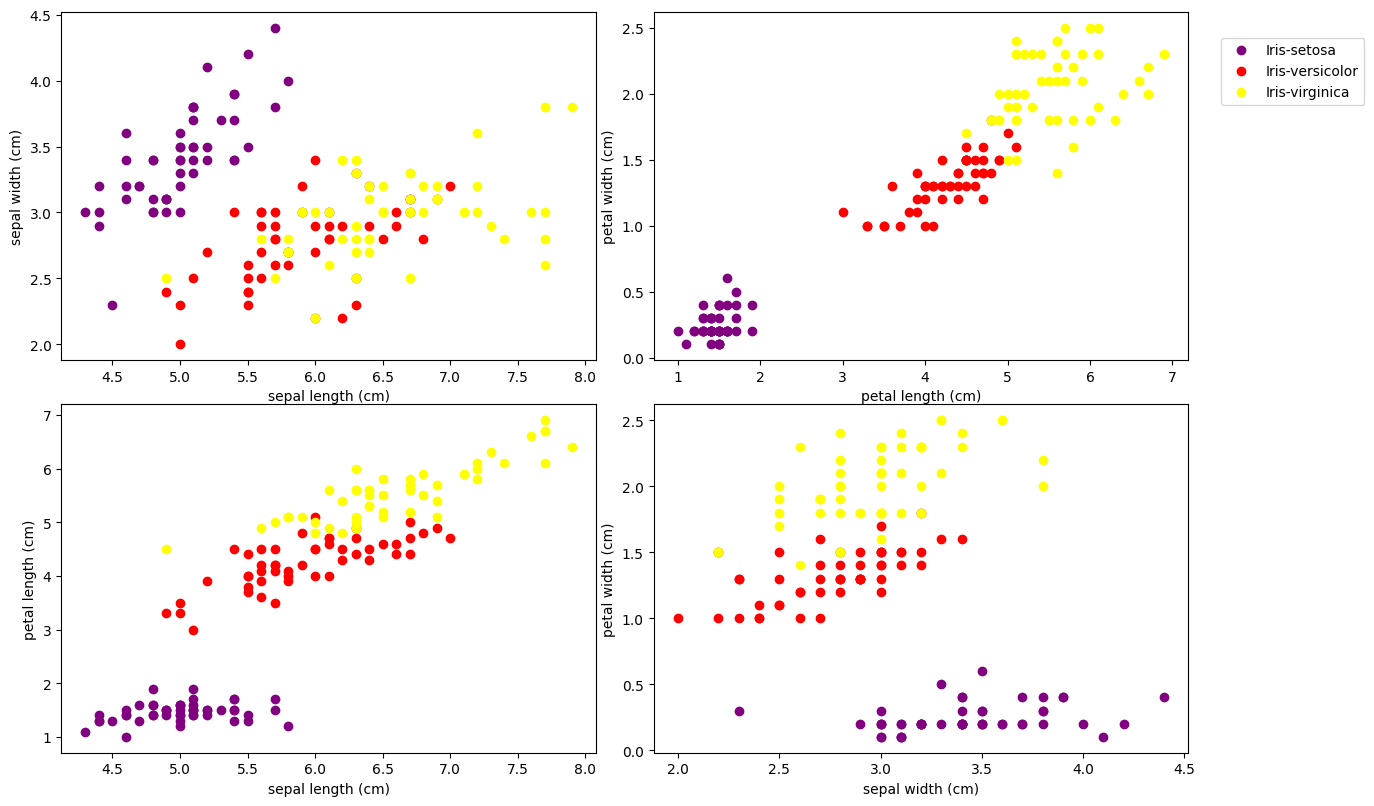

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.tight_layout()

plots = [(0, 1), (2, 3), (0, 2), (1, 3)]
new_colors = ["purple", "red", "yellow"]  # Updated colors
labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = dataset.columns[plots[i][0]]
        y = dataset.columns[plots[i][1]]
        ax.scatter(dataset[dataset["species"] == j][x], dataset[dataset["species"] == j][y], color=new_colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0, 0.85))
plt.show()


In [22]:
X = dataset.drop("species",axis=1).values
y = dataset["species"].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [24]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Creating Model

In [25]:
class Model(nn.Module):
    def __init__(self, input_features=4, hidden_layer1=25, hidden_layer2=30, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [11]:
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=3, bias=True)
)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [13]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0  loss: 1.10469639
epoch:  1  loss: 1.07238126
epoch:  2  loss: 1.04999053
epoch:  3  loss: 1.01722205
epoch:  4  loss: 0.98361319
epoch:  5  loss: 0.94968402
epoch:  6  loss: 0.91189277
epoch:  7  loss: 0.86843389
epoch:  8  loss: 0.82049751
epoch:  9  loss: 0.77061069
epoch: 10  loss: 0.71824563
epoch: 11  loss: 0.66607684
epoch: 12  loss: 0.61613554
epoch: 13  loss: 0.57020128
epoch: 14  loss: 0.52863628
epoch: 15  loss: 0.49220362
epoch: 16  loss: 0.46022129
epoch: 17  loss: 0.43116787
epoch: 18  loss: 0.40379286
epoch: 19  loss: 0.37788549
epoch: 20  loss: 0.35235199
epoch: 21  loss: 0.32582274
epoch: 22  loss: 0.30137447
epoch: 23  loss: 0.27921382
epoch: 24  loss: 0.25733691
epoch: 25  loss: 0.23614144
epoch: 26  loss: 0.21594884
epoch: 27  loss: 0.19731532
epoch: 28  loss: 0.18016990
epoch: 29  loss: 0.16486216
epoch: 30  loss: 0.15130630
epoch: 31  loss: 0.13936871
epoch: 32  loss: 0.12906441
epoch: 33  loss: 0.12015951
epoch: 34  loss: 0.11248770
epoch: 35  loss: 0.1

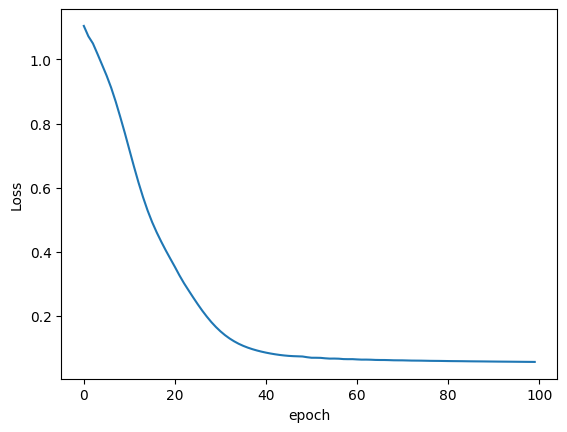

In [14]:
plt.plot(range(epochs), [loss.item() for loss in losses])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()


## Validating and Testing the Model

In [15]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [16]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df

,Y,YHat,Correct
0,0,0,1
1,0,0,1
2,0,0,1
3,1,1,1
4,2,2,1
5,2,2,1
6,0,0,1
7,2,2,1
8,1,1,1
9,1,1,1


In [17]:
df['Correct'].sum() / len(df)

1.0

## Using the Model to Classify New and Unseen Data

In [18]:
unknown_iris = torch.tensor([4.0,3.3,1.7,0.5])

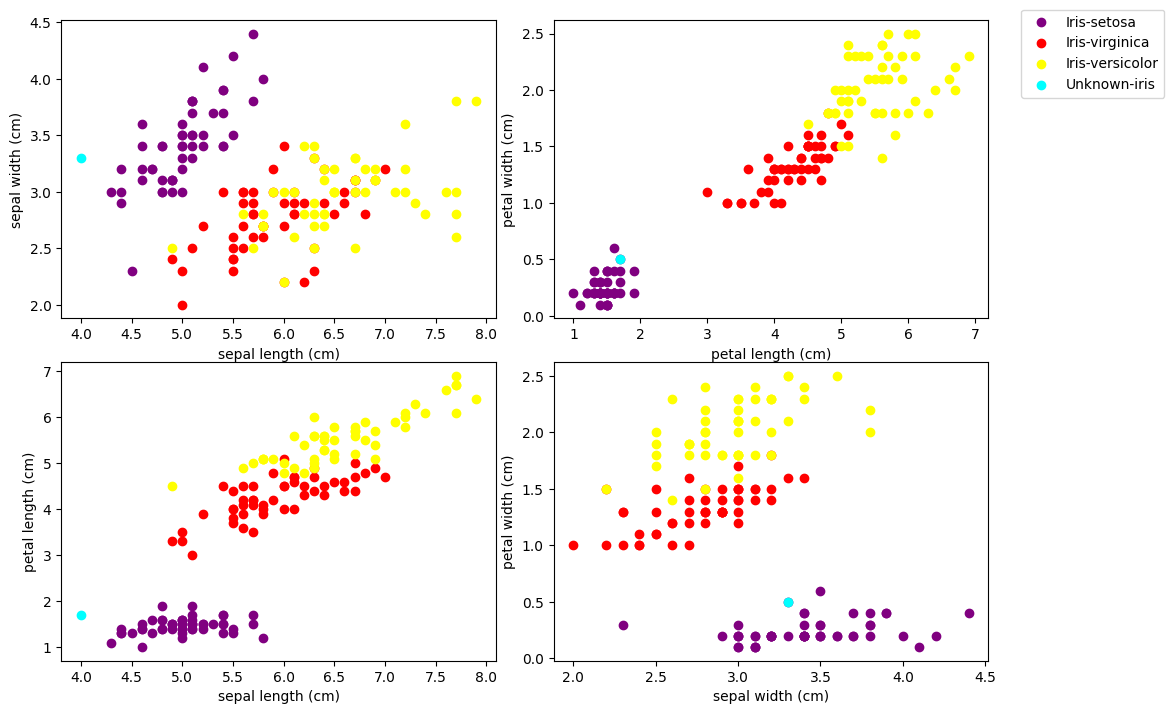

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
new_colors = ["purple", "red", "yellow", "cyan"]
labels = ['Iris-setosa','Iris-virginica','Iris-versicolor','Unknown-iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = dataset.columns[plots[i][0]]
        y = dataset.columns[plots[i][1]]
        ax.scatter(dataset[dataset["species"]==j][x], dataset[dataset["species"]==j][y], color=new_colors[j])
        ax.set(xlabel=x, ylabel=y)


    ax.scatter(unknown_iris[plots[i][0]], unknown_iris[plots[i][1]], color='cyan')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()


In [20]:
with torch.no_grad():
    print(model(unknown_iris))
    print()
    print(labels[model(unknown_iris).argmax()])

tensor([ 13.7153,   7.1016, -21.7746])

Iris-setosa
